In [ ]:
import sys
!{sys.executable} -m pip install opencv-python

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import cv2  

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 975.2 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:36
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:38
    --------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:39
    -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

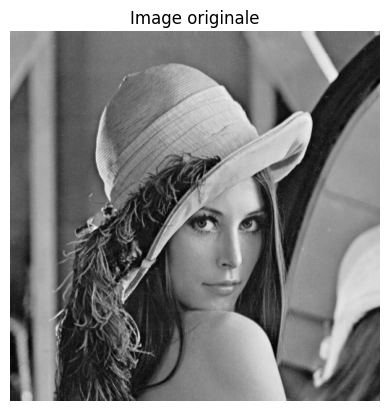

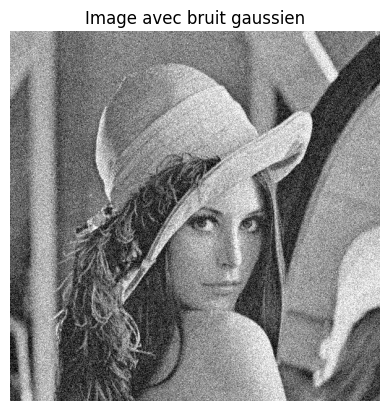

PSNR entre l'image originale et l'image bruitée :  20.06284987144521


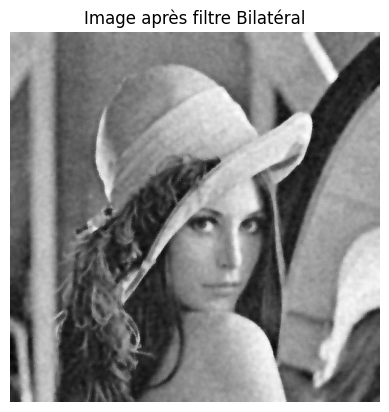

PSNR entre l'image originale et l'image débruitée :  28.547270628900705


In [7]:


# Charger et afficher l'image originale
image = import_image("lena.pgm")
display_image(image, "Image originale")

# Normaliser l'image entre 0 et 1
image = image / 255.0

# Ajouter du bruit gaussien de variance 0.01
noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)  # S'assurer que les valeurs restent entre 0 et 1
display_image(image_noised, 'Image avec bruit gaussien')

# Calculer le PSNR entre l'image originale et l'image bruitée
psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

# Appliquer le filtre bilatéral
# Convertir l'image en format uint8 pour le filtre bilatéral d'OpenCV
image_noised_uint8 = (image_noised * 255).astype(np.uint8)
image_filtree = cv2.bilateralFilter(image_noised_uint8, d=9, sigmaColor=75, sigmaSpace=75)

# Afficher l'image après le filtre bilatéral
display_image(image_filtree / 255.0, "Image après filtre Bilatéral")

# Calculer le PSNR entre l'image originale et l'image débruitée
psnr_originale_debruitee = psnr(image * 255, image_filtree)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)

# Sauvegarder les résultats
ski.io.imsave("results/noised.pgm", (image_noised * 255).astype(np.uint8))
ski.io.imsave("results/denoised.pgm", image_filtree)
